In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/mokas/Documents/1archive.zip',sep=';')

C:\Users\mokas\AppData\Local\Temp\ipykernel_23868\2535141271.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/mokas/Documents/1archive.zip',sep=';')


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
df.shape

(2075259, 9)

In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

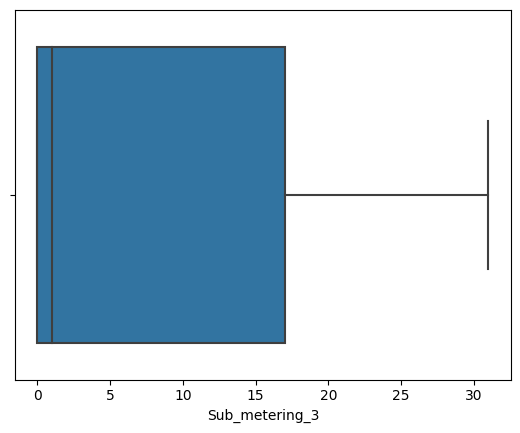

In [7]:
sns.boxplot(x = df['Sub_metering_3'])
plt.show()

In [8]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [9]:
df1 = df.copy()

In [10]:
df1.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [11]:
# Creating isolating col 
#obj_cols = df1.loc[:,df1.dtypes='O']
#print(obj_cols.columns)

# list comprehensation
#obj_col_dtype = list[col col in obj_cols]



In [12]:
df1.replace('?',np.nan,inplace=True)

In [13]:
df1.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
df1.drop(['Date','Time'],axis=1,inplace=True)

In [15]:
df1.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [16]:
df1['Global_active_power'] = df1['Global_active_power'].astype('float')

In [17]:
df1['Global_reactive_power'] = df1['Global_reactive_power'].astype('float')

In [18]:
df1['Voltage'] = df1['Voltage'].astype('float')

In [19]:
df1['Global_intensity'] = df1['Global_intensity'].astype('float')

In [20]:
df1['Sub_metering_1'] = df1['Sub_metering_1'].astype('float')

In [21]:
df1['Sub_metering_2'] = df1['Sub_metering_2'].astype('float')

In [22]:
df1.median()

Global_active_power        0.602
Global_reactive_power      0.100
Voltage                  241.010
Global_intensity           2.600
Sub_metering_1             0.000
Sub_metering_2             0.000
Sub_metering_3             1.000
dtype: float64

In [23]:
df1.describe().columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

# Null values

In [24]:
for i in df1.describe().columns:
    df1[i].replace(np.nan,df1[i].median(),inplace=True)

In [25]:
df1.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [26]:
df1['Energy_consumption'] = (df1['Global_active_power'] * 1000/60) - (df1['Sub_metering_1'] + df1['Sub_metering_2'] + df1['Sub_metering_3'])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Energy_consumption     float64
dtypes: float64(8)
memory usage: 126.7 MB


In [28]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,9.311171e+00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,9.525778e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [29]:
df1.shape[1]

8

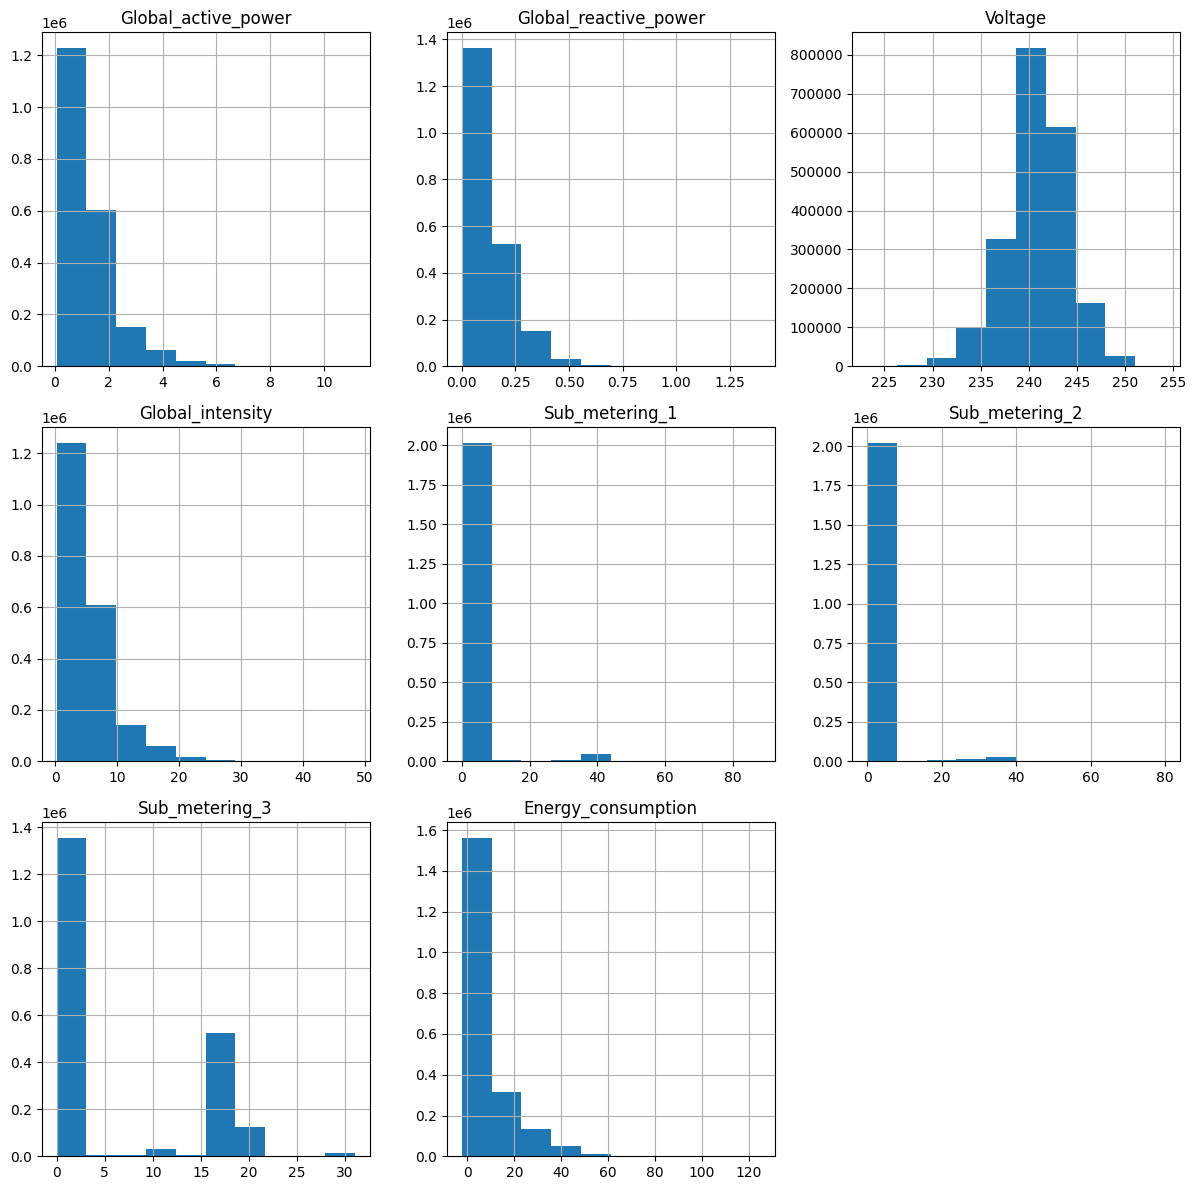

In [30]:
df1.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

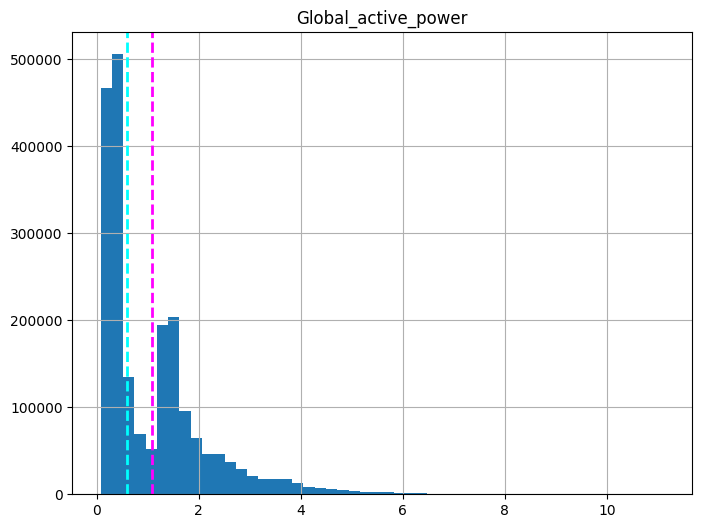

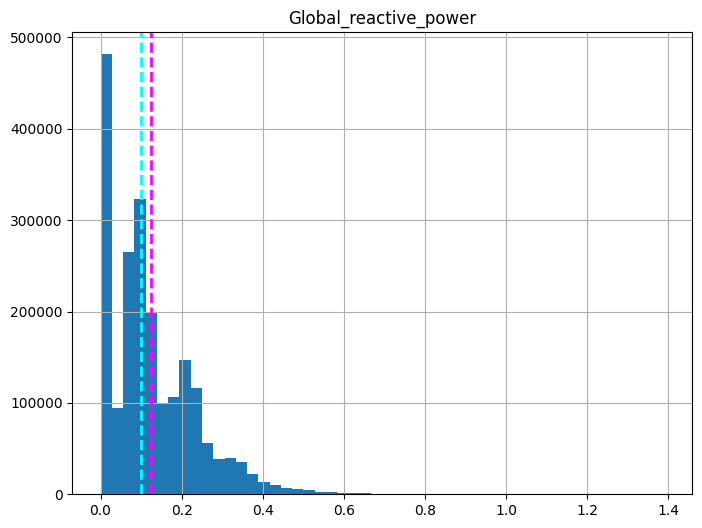

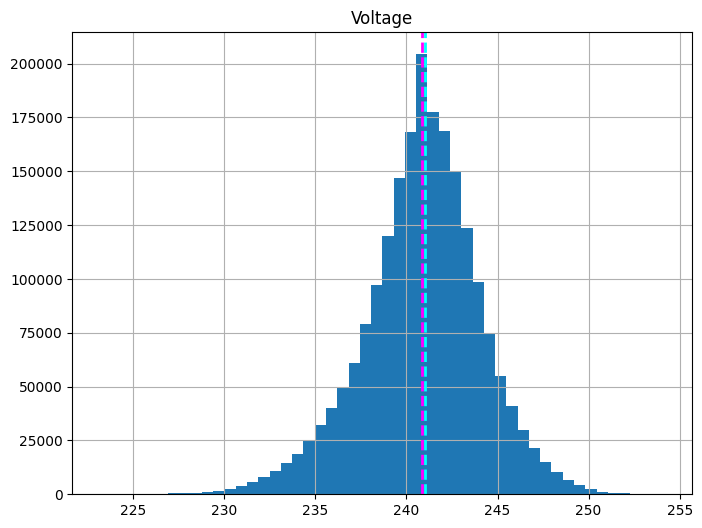

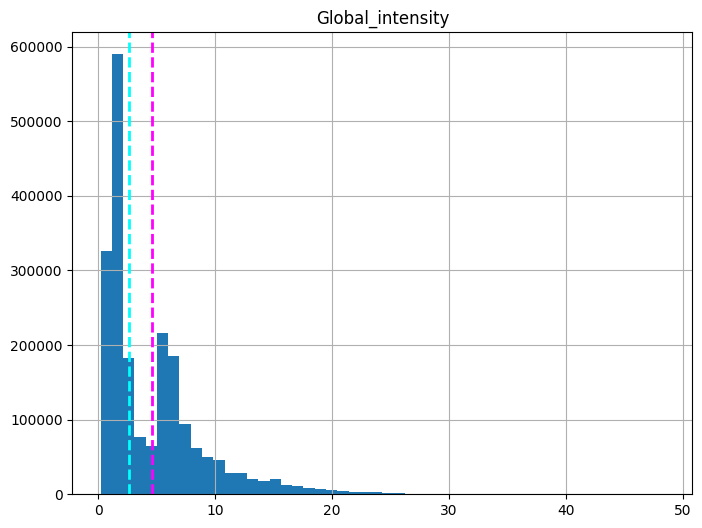

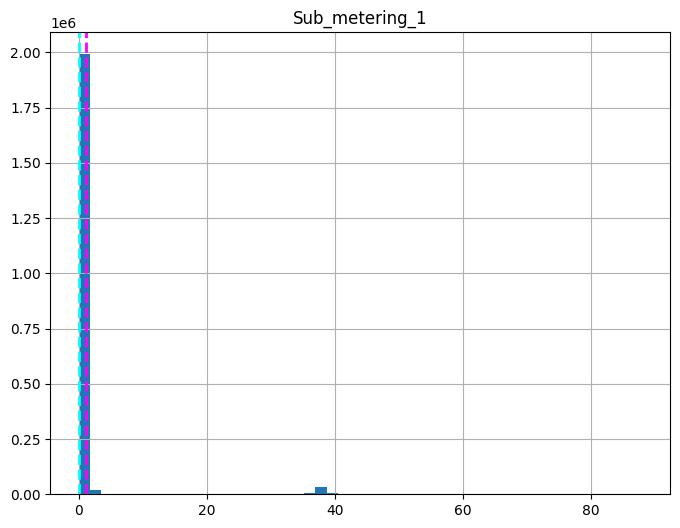

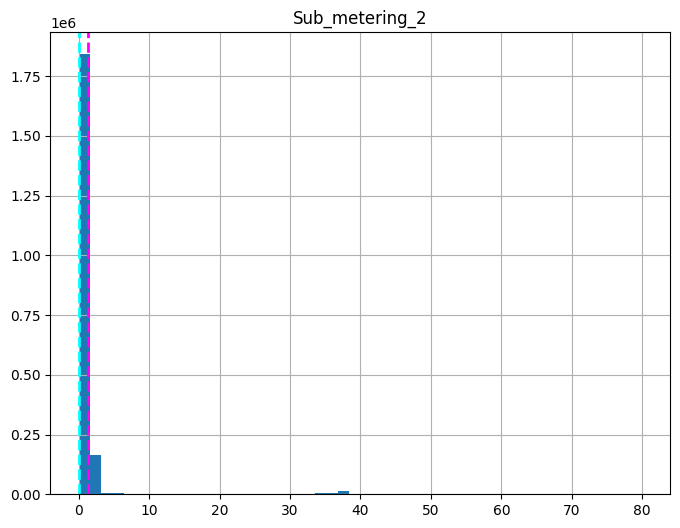

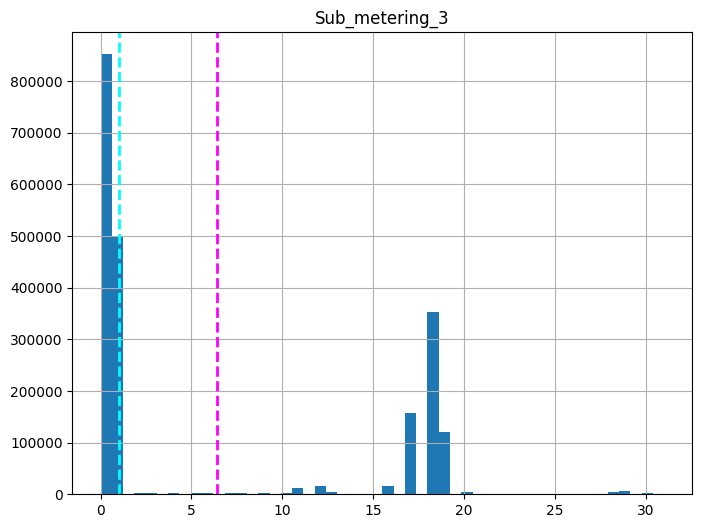

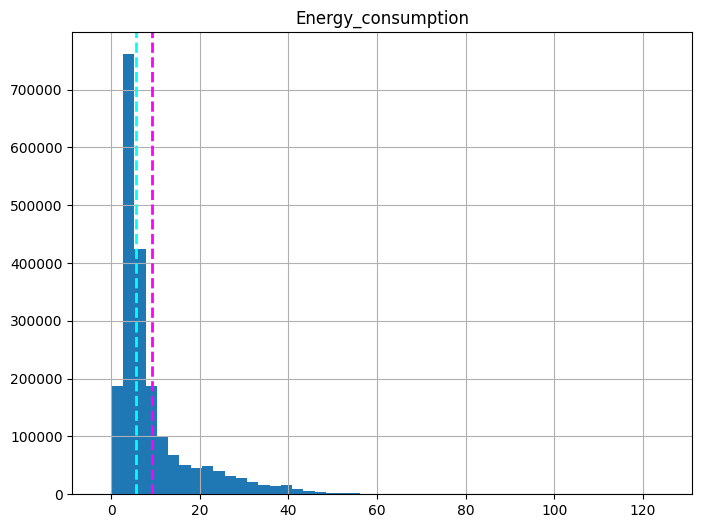

In [31]:
# plot a bar plot for each numerical feature count

numeric_features = df1.describe().columns
numeric_features
     
for col in numeric_features[:]:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

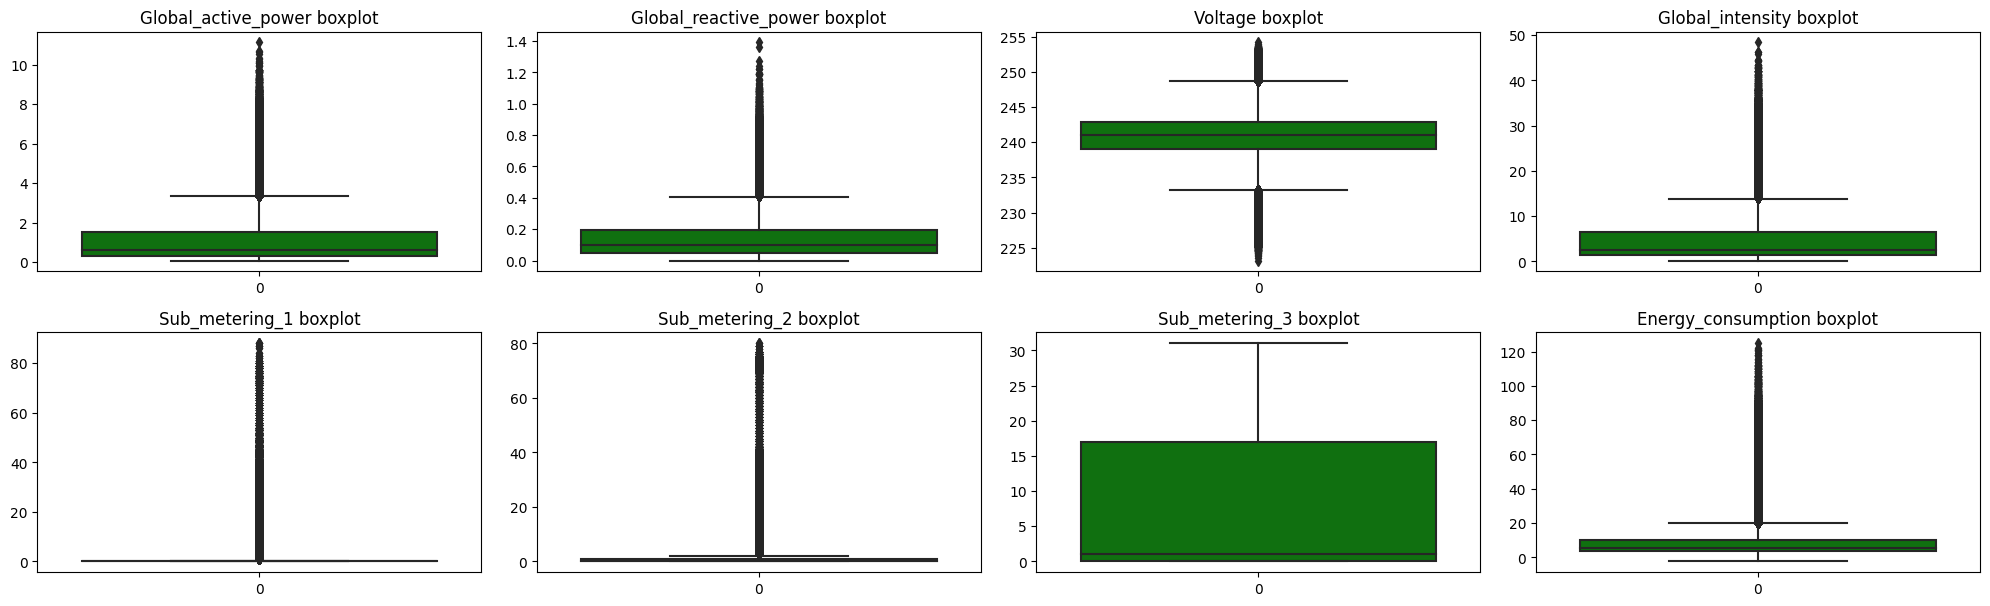

In [32]:
cont_vars = list(df1.columns)
def outliers_visual(data):
    plt.figure(figsize=(20, 30))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        sns.boxplot(data[col],color='green')
        plt.title('{} boxplot'.format(col))
      
    plt.tight_layout()
    plt.show()
outliers_visual(df1)

In [33]:
corr_p = df1.corr()

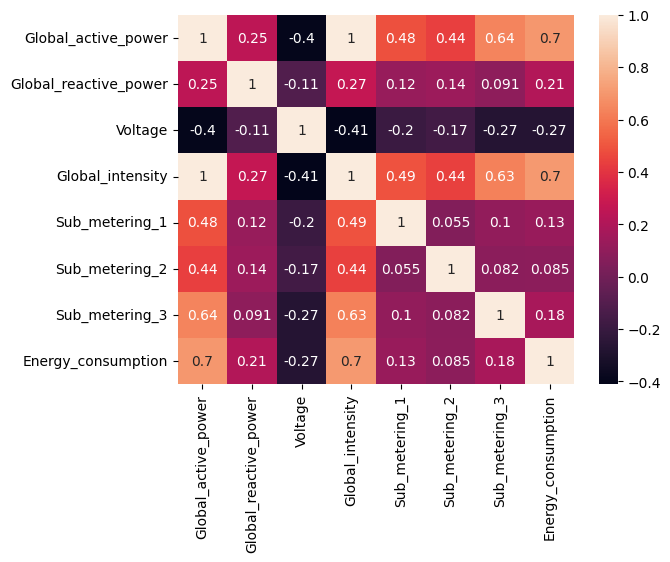

In [34]:
sns.heatmap(corr_p,annot=True)
plt.show()

In [35]:
df1['Energy_consumption']

0          52.266667
1          72.333333
2          70.566667
3          71.800000
4          43.100000
             ...    
2075254    15.766667
2075255    15.733333
2075256    15.633333
2075257    15.566667
2075258    15.533333
Name: Energy_consumption, Length: 2075259, dtype: float64

In [36]:
# Multicollinearity between independent variable

X = df1.drop('Energy_consumption',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature          VIF
0    Global_active_power  1271.005805
1  Global_reactive_power     2.898039
2                Voltage     3.066629
3       Global_intensity  1276.514062
4         Sub_metering_1     1.662236
5         Sub_metering_2     1.570307
6         Sub_metering_3     3.628081


# We can drop Global intensity or Global active power due to vif values greater than 10.
# And we also seen this correlation in heatmap which is one.

In [37]:
df1.drop('Global_intensity',axis=1,inplace=True)

In [38]:
X = df1.drop('Energy_consumption',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature       VIF
0    Global_active_power  7.572018
1  Global_reactive_power  2.378081
2                Voltage  3.060752
3         Sub_metering_1  1.651922
4         Sub_metering_2  1.558518
5         Sub_metering_3  3.438222


In [39]:
# Here applying min max scaling on dataframe for.
# Applying min max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']] = scaler.fit_transform(df1[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']])
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumption
0,0.374796,0.300719,0.376090,0.0,0.0125,0.548387,52.266667
1,0.478363,0.313669,0.336995,0.0,0.0125,0.516129,72.333333
2,0.479631,0.358273,0.326010,0.0,0.0250,0.548387,70.566667
3,0.480898,0.361151,0.340549,0.0,0.0125,0.548387,71.800000
4,0.325005,0.379856,0.403231,0.0,0.0125,0.548387,43.100000


In [40]:
df2 =df1.copy()

In [41]:
df2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
       'Energy_consumption'],
      dtype='object')

In [42]:
from sklearn import preprocessing
scaler = preprocessing.Normalizer()
df2[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']] = scaler.fit_transform(df2[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']])

In [43]:
df3 = df1.copy()

In [44]:
from scipy import stats
df3[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']][(np.abs(stats.zscore(df3[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']])) < 3).all(axis=1)].reset_index()

,index,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,0.374796,0.300719,0.376090,0.0,0.0125,0.548387
1,14,0.360130,0.303597,0.389015,0.0,0.0125,0.548387
2,15,0.299475,0.202878,0.450404,0.0,0.0000,0.548387
3,16,0.289154,0.109353,0.437157,0.0,0.0000,0.548387
4,17,0.303639,0.112230,0.447819,0.0,0.0000,0.548387
...,...,...,...,...,...,...,...
1938502,2075254,0.078762,0.000000,0.556704,0.0,0.0000,0.000000
1938503,2075255,0.078580,0.000000,0.542811,0.0,0.0000,0.000000
1938504,2075256,0.078037,0.000000,0.536995,0.0,0.0000,0.000000
1938505,2075257,0.077675,0.000000,0.533118,0.0,0.0000,0.000000


In [45]:
# Figure size format setting.

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

C:\Users\mokas\AppData\Local\Temp\ipykernel_23868\3469023714.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [46]:
# Splitting the data of min max scaling
X = df1.drop('Energy_consumption',axis=1)
y = df1['Energy_consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
y_pred

array([10.9       ,  6.1       , 20.43333333, ...,  2.63333333,
        3.03333333,  4.83333333])

In [47]:
# Calculating MSE,RMSE,R2 Score values for train

MSE_train = mean_squared_error(y_train, y_pred)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred)
print(f'R2_Score= {R2_Score_train}')
     

MSE= 4.6584268623514406e-23
RMSE= 6.8252669269058196e-12
R2_Score= 1.0


In [48]:
# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(X_train,y_train)
y_pred_test = regr1.predict(X_test)
y_pred_test

array([33.86666667, 17.83333333, 11.1       , ...,  5.16666667,
       30.9       , 21.2       ])

In [49]:
# Use MSE to evaluate the above model
print("R squared: {}".format(r2_score(y_true = y_test,y_pred= y_pred_test)))

MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R squared: 1.0
MSE= 4.6662438327264175e-23
RMSE= 6.830991020874217e-12


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Sub_metering_1         float64
 4   Sub_metering_2         float64
 5   Sub_metering_3         float64
 6   Energy_consumption     float64
dtypes: float64(7)
memory usage: 110.8 MB


In [51]:
# Splitting the data of normalized scaling
X = df2.drop('Energy_consumption',axis=1)
y = df2['Energy_consumption']

from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_1,y_train_1)
y_pred_1 = regr.predict(X_train_1)
y_pred_1

array([10.54307702,  6.28014458, 18.57678335, ...,  2.31238274,
        3.81736751,  3.49485923])

In [52]:
# Calculating MSE,RMSE,R2 Score values for train

MSE_train_1 = mean_squared_error(y_train_1, y_pred_1)
print(f'MSE= {MSE_train_1}')

RMSE_train_1 = np.sqrt(MSE_train_1)
print(f'RMSE= {RMSE_train_1}')

R2_Score_train_1= r2_score(y_train_1, y_pred_1)
print(f'R2_Score= {R2_Score_train_1}')

MSE= 6.157052173939685
RMSE= 2.481340801651334
R2_Score= 0.9322942908488457


In [53]:
# Splitting the data of normalized scaling
X = df2.drop('Energy_consumption',axis=1)
y = df2['Energy_consumption']

from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_1,y_train_1)
y_pred_test_1 = regr.predict(X_test_1)
y_pred_test_1

array([31.07132011, 16.12173616, 10.62595492, ...,  4.64931112,
       27.25999707, 19.88674229])

In [54]:
# Calculating MSE,RMSE,R2 Score values for test

MSE_test_1 = mean_squared_error(y_test_1, y_pred_test_1)
print(f'MSE= {MSE_test_1}')

RMSE_test_1 = np.sqrt(MSE_test_1)
print(f'RMSE= {RMSE_test_1}')

R2_Score_test_1 = r2_score(y_test_1, y_pred_test_1)
print(f'R2_Score= {R2_Score_test_1}')

MSE= 6.075600442721299
RMSE= 2.4648733116980472
R2_Score= 0.932454000331486


In [55]:
# Splitting the data of z score treatment

X = df3.drop(['Energy_consumption'],axis=1)
y = df3['Energy_consumption']

from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X,y,random_state=0,test_size=0.20)

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_2,y_train_2)
y_pred_2 = regr.predict(X_train_2)
y_pred_2

array([10.9       ,  6.1       , 20.43333333, ...,  2.63333333,
        3.03333333,  4.83333333])

In [56]:
# Calculating MSE,RMSE,r2_score of train data
MSE_train_2 = mean_squared_error(y_train_2,y_pred_2)
print(f'MSE = {MSE_train_2}')

RMSE_train_2 = np.sqrt(MSE_train_2)
print(f'RMSE = {RMSE_train_2}')

r2_score_train_2 = r2_score(y_train_2,y_pred_2)
print(f'r2_score = {r2_score_train_2}')

MSE = 4.6584268623514406e-23
RMSE = 6.8252669269058196e-12
r2_score = 1.0


In [57]:
# splitting the data of z score treatment

X = df3.drop(['Energy_consumption'],axis=1)
y = df3['Energy_consumption']

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,random_state=0,test_size=0.2)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_2,y_train_2)
y_pred_test_2 = regr.predict(X_test_2)
y_pred_test_2

array([33.86666667, 17.83333333, 11.1       , ...,  5.16666667,
       30.9       , 21.2       ])

In [58]:
# MSE,RMSE,r2_score

MSE_2 = mean_squared_error(y_test_2,y_pred_test_2)
print(f'MSE = {MSE_2}')

RMSE_2 = np.sqrt(MSE_2)
print(f'RMSE = {RMSE_2}')

r2_score_2 = r2_score(y_test_2,y_pred_test_2)
print(f'r2_score = {r2_score_2}')

MSE = 4.6662438327264175e-23
RMSE = 6.830991020874217e-12
r2_score = 1.0


# Assumptions

# 1. Linearity

C:\Users\mokas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


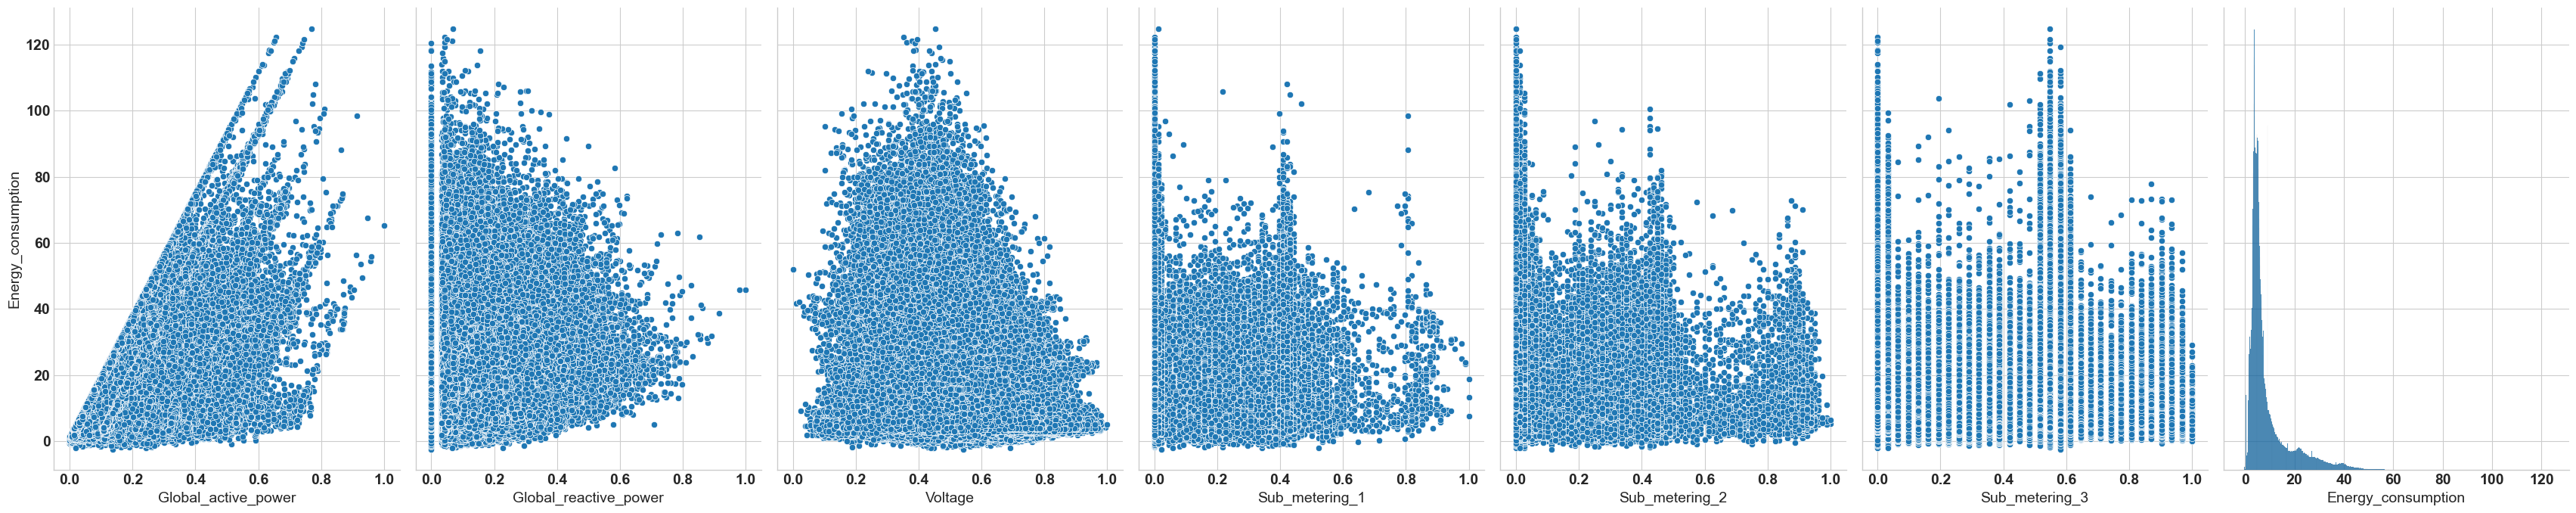

In [59]:
p = sns.pairplot(df1,x_vars=df1.columns,y_vars='Energy_consumption', size=7,aspect = 0.7)
plt.tight_layout()
plt.show()

# 2. Mean of residual

One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [60]:
residuals = y_train.values - y_pred
print(residuals)
mean_residuals = np.mean(residuals)
print("Mean_of_residuals {}".format(mean_residuals))

[ 4.41957582e-12 -4.28457270e-12  7.89768251e-12 ... -5.62616620e-12
 -4.99333908e-12 -4.34585701e-12]
Mean_of_residuals 1.465827879305437e-14


# 3. Check for homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

Error in callback <function _draw_all_if_interactive at 0x0000024C7FF74900> (for post_execute):


KeyboardInterrupt: 

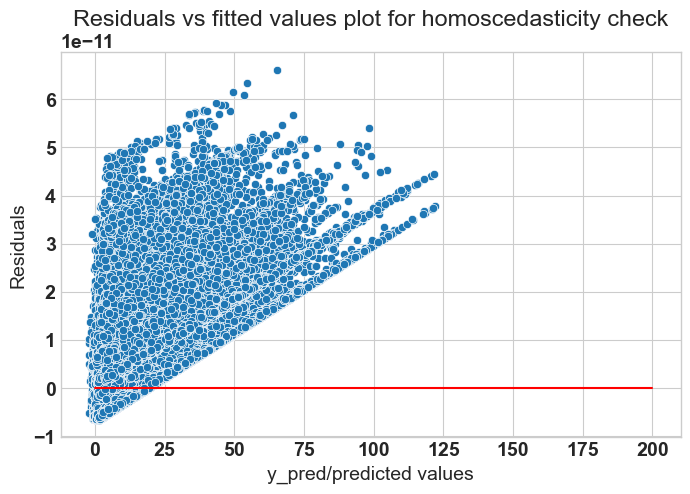

In [61]:
#Checking for  heteroscedasticity! for train data
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-10,10)
# plt.xlim(0,200)
p = sns.lineplot(x=[0,200],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Goldfeld Quandt Test

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [62]:
# Goldfeld Quandt Test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statstic','p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statstic', 1.0059734099680724), ('p-value', 0.003333054596250881)]

Since p value is less than 0.05 in Goldfeld Quandt Test, we can reject it's null hypothesis that error terms are heteroscedastic.

# 4. Check for Normality of error terms/residuals

C:\Users\mokas\AppData\Local\Temp\ipykernel_23868\3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


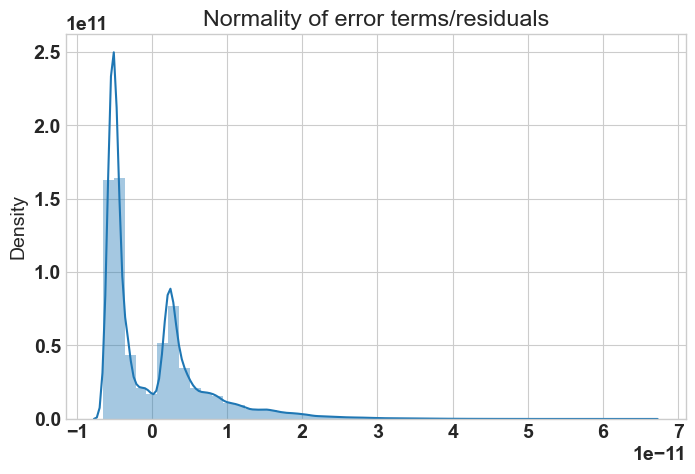

In [63]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took.
Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal.
A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

In [64]:
print(y_train)

1336274    10.900000
751372      6.100000
1175859    20.433333
358736     19.200000
291347      3.833333
             ...    
963395     21.166667
117952      6.866667
1484405     2.633333
305711      3.033333
2034348     4.833333
Name: Energy_consumption, Length: 1660207, dtype: float64


In [65]:
print(y_pred.max())
print(y_pred.min())
print(residuals.max())
print(residuals.min())

122.16666666662886
-2.13333333332817
6.610889613511972e-11
-6.546985176214548e-12


# 5. No autocorrelation of residuals

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms.
There should not be autocorrelation in the data so the error terms should not form any pattern

KeyboardInterrupt: 

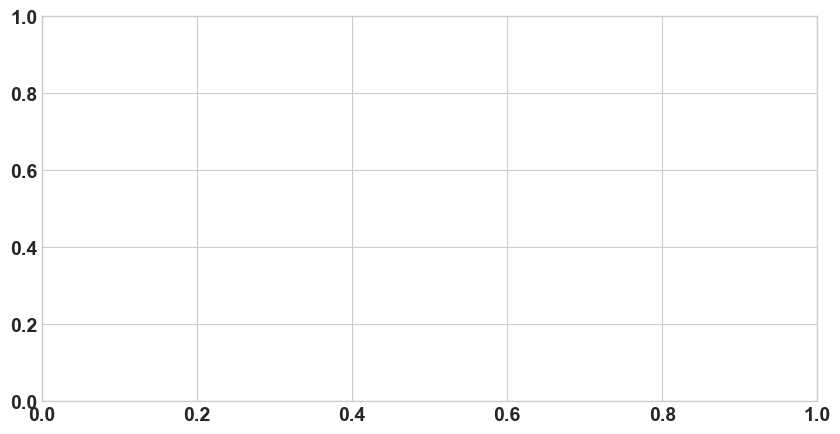

In [73]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x= y_pred,y= residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.xlim(-1,115)
plt.ylim(-60,60)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [ ]:
!pip install statsmodels

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.


In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

In [74]:
residuals.groupby(residuals.values)

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [ ]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

# 6. No perfect multicollinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df1.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

# Assumptions

# 1. Linearity

In [ ]:
p = sns.pairplot(df2,x_vars=df2.columns,y_vars='Energy_consumption', size=7,aspect = 0.7)
plt.tight_layout()
plt.show()

# 2. Mean of residual

In [ ]:
residuals_1 = y_train_1.values - y_pred_1
print(residuals_1)
mean_residuals_1 = np.mean(residuals_1)
print("Mean_of_residuals {}".format(mean_residuals_1))

# 3. Check for homoscedasticity

In [ ]:
#Checking for  heteroscedasticity! for train data
p = sns.scatterplot(x=y_pred_1,y=residuals_1)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-10,10)
# plt.xlim(0,200)
p = sns.lineplot(x=[0,125],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# Goldfeld Quandt Test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statstic','p-value']
test = sms.het_goldfeldquandt(residuals_1, X_train_1)
lzip(name, test)

Since p value is greater than 0.05 in Goldfeld Quandt Test, we can not reject it's null hypothesis that error terms are homoscedastic.

# 4. Check for Normality of error terms/residuals

In [ ]:
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# 5. No autocorrelation of residuals

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x= y_pred_1,y= residuals_1,data= df2,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals_1 , lags = 40)[1])

Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

In [ ]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals_1, lags=40)
plt.show()

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

# 6. No perfect multicollinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df1.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

# Assumptions

# 1.Linearity

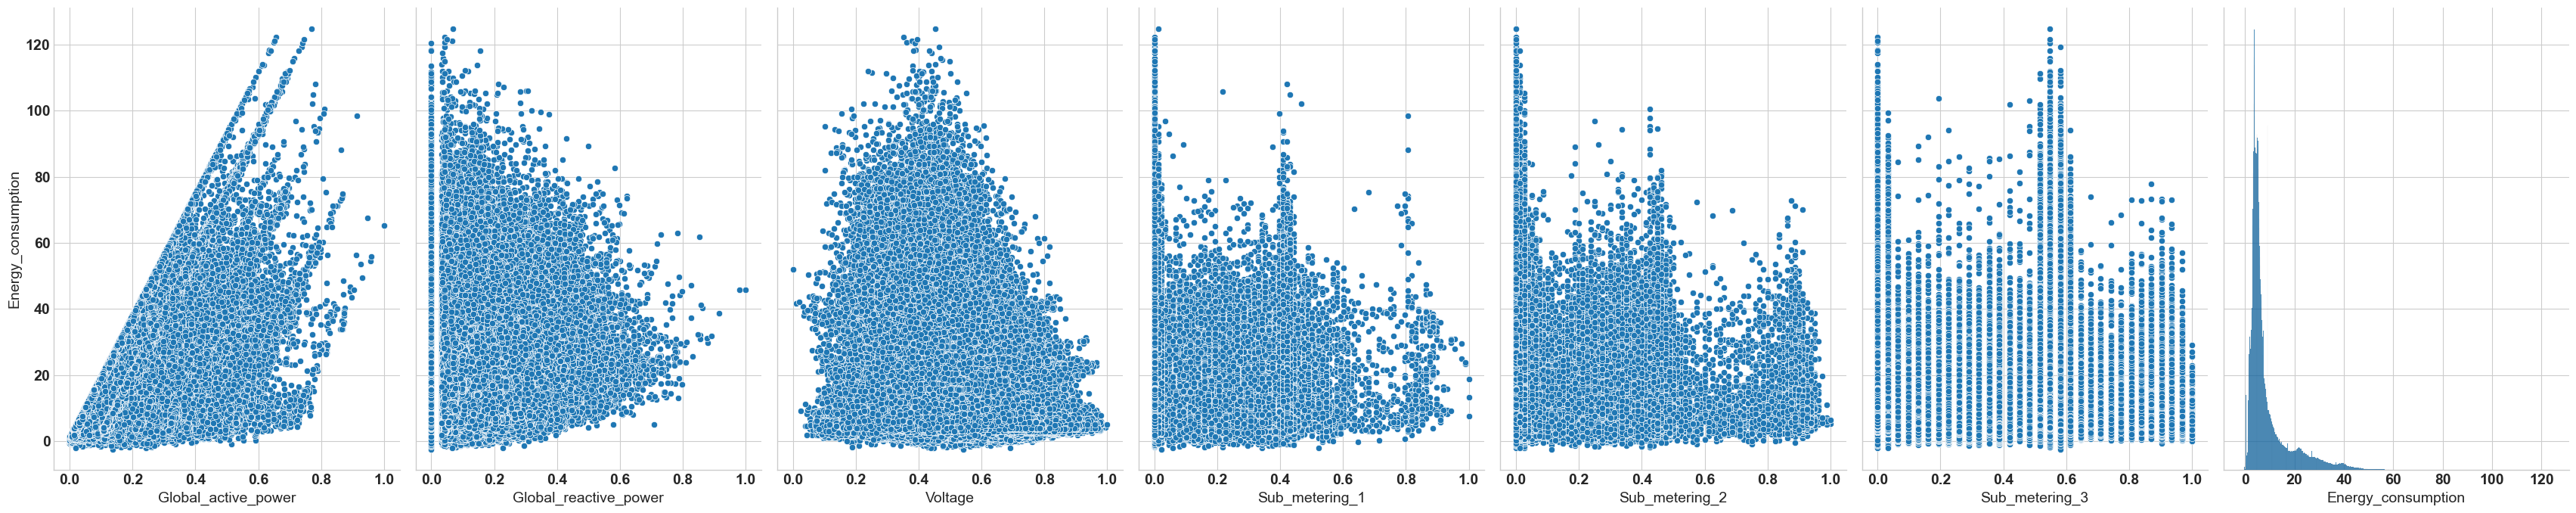

In [67]:
sns.pairplot(df3,x_vars=df3.columns,y_vars='Energy_consumption',height=7,aspect=0.7)
plt.tight_layout()
plt.show()

# 2. Mean of residuals

In [69]:
residuals_2 = y_train_2 - y_pred_2
mean_residuals_2 = np.mean(residuals_2)
print(mean_residuals_2)

1.465827879305437e-14


# 3. Checking for homoscedasticity

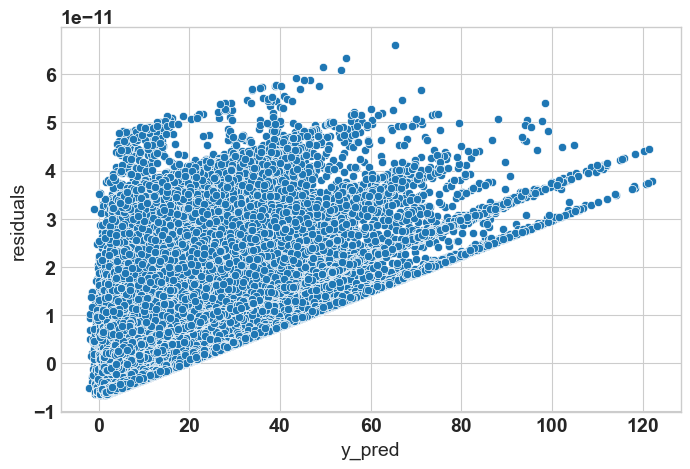

In [72]:
p = sns.scatterplot(x=y_pred_2,y=residuals_2)
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()